# Linear Regression with Regularization

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error

from scipy.special import inv_boxcox
import statsmodels.api as sm

# Motivation

Increasing the number of features (explanatory variables) can potentially enhance the predictive power of a linear regression model. However, it is important to note that not all features contribute equally to explaining the variability in the response variable, and some may even be redundant to each other (multicollinearity). This analysis will investigate regularization techniques to shrinking or eliminate the impact from less important features. This process can be viewed as a form of variable selection, identifying the most valuable predictors for the model.

# Import Dataset

In [2]:
dir = "/Users/yola.kamalita/Documents/Project/Data-Science-Learning-Projects/crimes_prediction/data"

In [3]:
df_new = pd.read_csv(os.path.join(dir, "df_new.csv"))
df_new_t = pd.read_csv(os.path.join(dir, "df_new_transform.csv"))

# Training, Validation, Test Split

Test set will be unseen during training.

In [4]:
# Original Dataset

X = df_new.drop('ViolentCrimesPerPop',axis=1)
y = df_new['ViolentCrimesPerPop'].values
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_training, y_training, test_size=0.10, random_state=42)

In [5]:
# Remove 'ViolentCrimesPerPop' equals to 0

df_new_r = df_new[df_new['ViolentCrimesPerPop']>0].reset_index(drop=True)

X_r = df_new_r.drop('ViolentCrimesPerPop',axis=1)
y_r = df_new_r['ViolentCrimesPerPop'].values
X_training_r, X_test_r, y_training_r, y_test_r = train_test_split(X_r, y_r, test_size=0.10, random_state=42)
X_train_r, X_valid_r, y_train_r, y_valid_r = train_test_split(X_training_r, y_training_r, test_size=0.10, random_state=42)

In [6]:
# Transformed 'ViolentCrimesPerPop'

X_t = df_new_t.drop('ViolentCrimesPerPop',axis=1)
y_t = df_new_t['ViolentCrimesPerPop'].values
X_training_t, X_test_t, y_training_t, y_test_t = train_test_split(X_t, y_t, test_size=0.10, random_state=42)
X_train_t, X_valid_t, y_train_t, y_valid_t = train_test_split(X_training_t, y_training_t, test_size=0.10, random_state=42)

In [7]:
# Validation Check
X_train_r.equals(X_train_t)

True

In [8]:
# Validation Check
X_valid_r.equals(X_valid_t)

True

In [9]:
# Validation Check
X_test_r.equals(X_test_t)

True

# Linear Regression (Transformed Response Variable)

In [10]:
# Model for Original Dataset

LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(X_train,y_train)

y_pred = LinReg.predict(X_valid)

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1415


In [11]:
# Model for Original Dataset after removing 'ViolentCrimesPerPop' equals to 0

LinReg_1 = LinearRegression()
LinReg_1.fit(X_train_r,y_train_r)

y_pred_r = LinReg_1.predict(X_valid_r)

rmse_valid_r = root_mean_squared_error(y_pred_r,y_valid_r)
print('RMSE Linear Regression (Valid): ', round(rmse_valid_r,4))

RMSE Linear Regression (Valid):  0.1158


In [12]:
# Model for Transformed 'ViolentCrimesPerPop'

LinReg_2 = LinearRegression()
LinReg_2.fit(X_train_t,y_train_t)

lambda_ = 0.11908089131390148
y_pred_t = LinReg_2.predict(X_valid_t)
y_pred_t = inv_boxcox(y_pred_t, lambda_)

rmse_valid_t = root_mean_squared_error(y_pred_t,y_valid_r)
print('RMSE Linear Regression (Valid): ', round(rmse_valid_t,4))

RMSE Linear Regression (Valid):  0.1162


Transforming 'ViolentCrimesPerPop' does not improve the performance of the Linear Regression, comparing 2nd and 3rd results. Based on this finding, the non-transformed response variable will be used to explore the feature selection and regression methods.

# Linear Regression (Baseline)

In [13]:
# Linear Regression Coefficient

LinReg.coef_

array([-2.00611586e-01, -6.54624210e-02,  1.94315088e-01, -6.53253723e-02,
        1.78388332e-02,  8.12746217e-02,  2.21683778e-01, -2.07472153e-01,
       -2.27358875e-01,  7.19109244e-02,  6.23361311e-02,  3.55237463e-02,
       -2.27855553e-01, -1.57963504e-01,  4.61061098e-02, -2.27057130e-01,
        5.76556756e-02, -1.63179909e-02, -8.57785682e-02,  2.75291448e-01,
       -1.23159811e-02, -2.74294993e-01, -5.45332538e-02, -4.49889306e-02,
        2.94209289e-02,  5.16022323e-02,  1.30300443e-02,  1.54968083e-01,
       -2.92997885e-01, -5.95565823e-02, -1.79270342e-02,  4.78800503e-02,
       -2.10127131e-02,  2.25562912e-01, -6.98140285e-02,  1.77629351e-02,
        9.95448767e-02,  1.44727414e-01,  3.90123742e-01,  2.69753505e-01,
        5.11302362e-02, -3.88656732e-01, -3.42233673e-01,  2.76117288e-02,
       -2.70779810e-01, -1.19893641e-01, -5.49942452e-03,  5.65046666e-02,
       -2.22930099e-01, -9.09168874e-02,  1.10117089e-01, -1.36115111e-01,
        6.72535473e-02,  

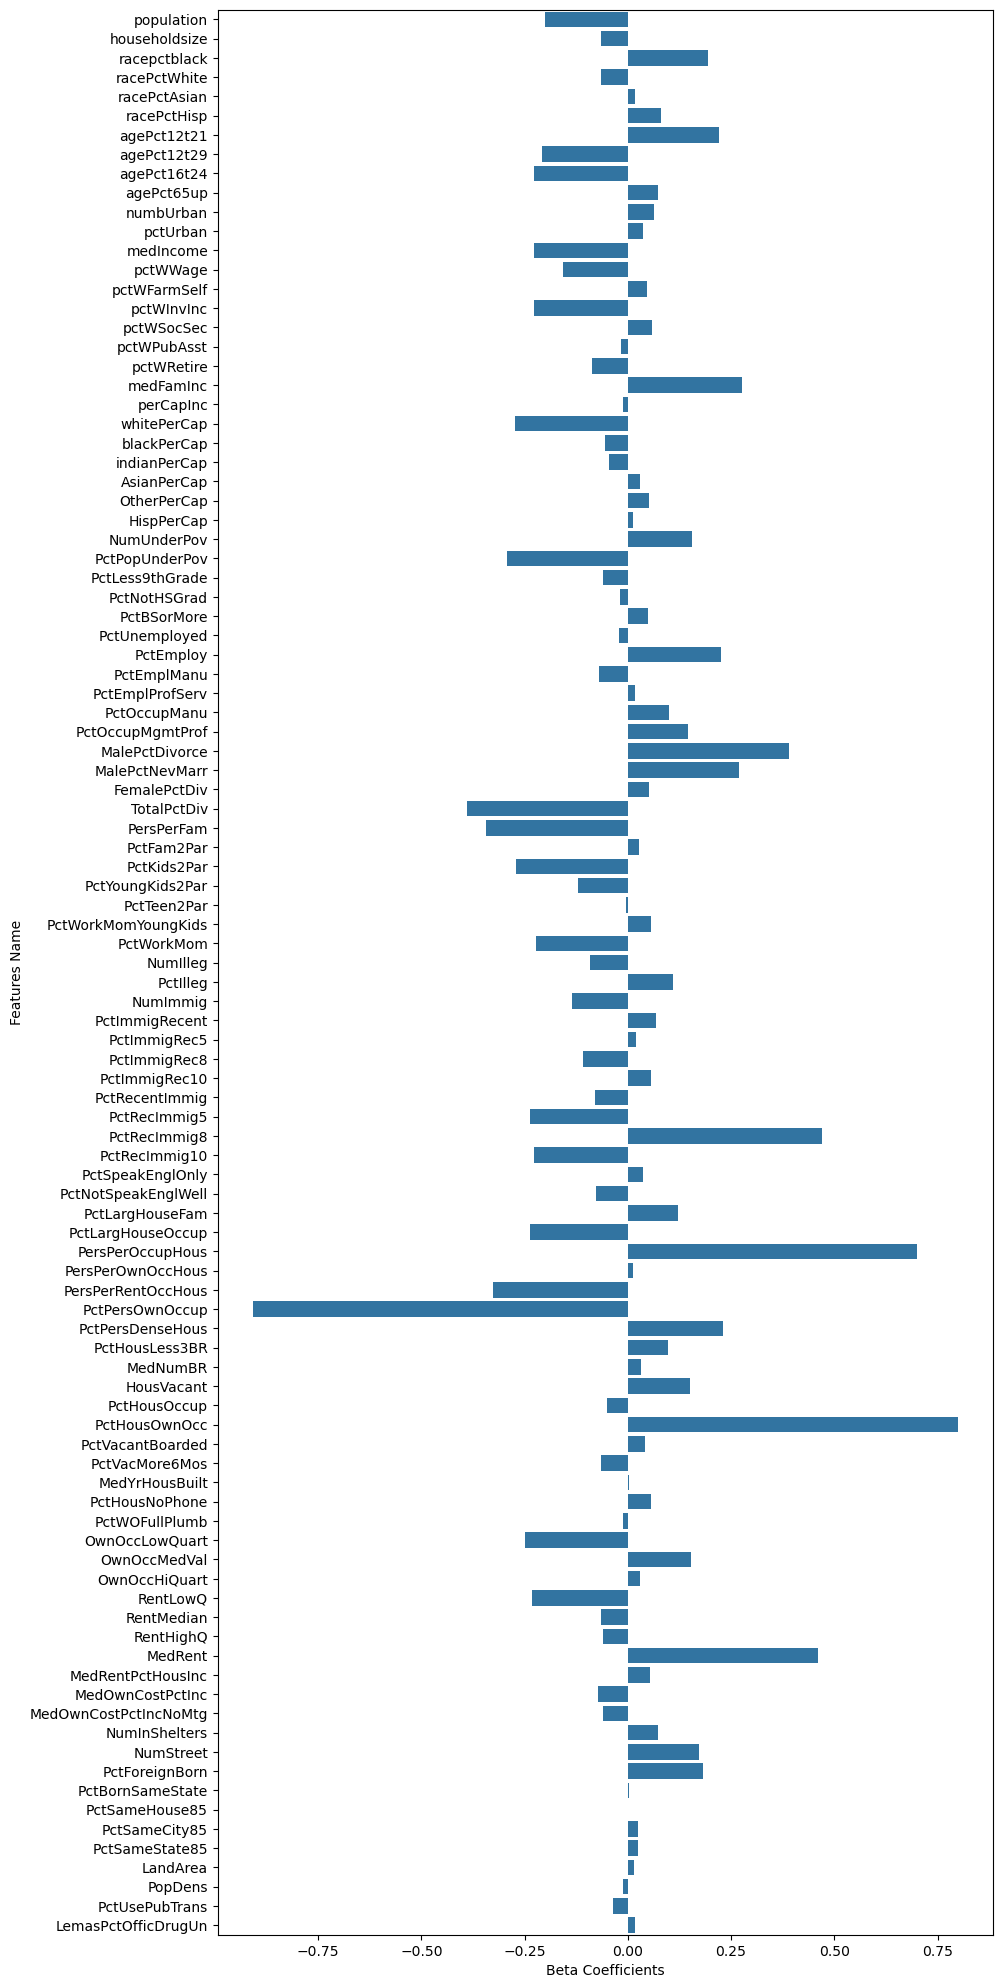

In [14]:
# Plot Beta Coef

plt.figure(figsize=(10,25))

sns.barplot(x=LinReg.coef_, y=df_new.columns[:-1])

plt.xlabel('Beta Coefficients')
plt.ylabel('Features Name')
plt.show()

The regression coefficients represent the relationship between independent variables and response variable. Both variables changes into the same direction if the value is positive, and into different direction if negative. The magnitude indicates how much the response variable changes when an independent variable changes by one unit, assuming the other independent variables remain the same. It can be also interpreted as how important the independent variable to the response variable.

Statistical testing can be also performed to check if the beta coefficients are significant or not. This is available using `OLS` from `statsmodels.api`.

For example, if we increase the 'population' by one unit while keeping everything else the same, we expect 'ViolentCrimesPerPop' to decrease by 0.20. Moreover, a one-unit increase in 'PctPersOwnOccup' (with all other variables held constant) is predicted to result in a 0.90 decrease in 'ViolentCrimesPerPop'. It means 'PctPersOwnOccup' has stronger relationship than 'population', and give more influence to the response variable as well.

In [15]:
# Get the top 10 features based on the coefficient values

# Get the absolute values
abs_values = np.abs(LinReg.coef_)

# Get the indices of the top ten maximum absolute values
top_ten_indices = abs_values.argsort()[-10:][::-1]

# Get the corresponding values
top_ten_values = LinReg.coef_[top_ten_indices]

In [16]:
top_ten_indices

array([67, 73, 64, 58, 85, 38, 41, 42, 66, 28])

In [17]:
top_ten_values

array([-0.9075208 ,  0.79831915,  0.70127028,  0.47100719,  0.46140809,
        0.39012374, -0.38865673, -0.34223367, -0.32561309, -0.29299788])

In [18]:
top_ten_features = df_new.columns[top_ten_indices]

top_ten_features

Index(['PctPersOwnOccup', 'PctHousOwnOcc', 'PersPerOccupHous', 'PctRecImmig8',
       'MedRent', 'MalePctDivorce', 'TotalPctDiv', 'PersPerFam',
       'PersPerRentOccHous', 'PctPopUnderPov'],
      dtype='object')

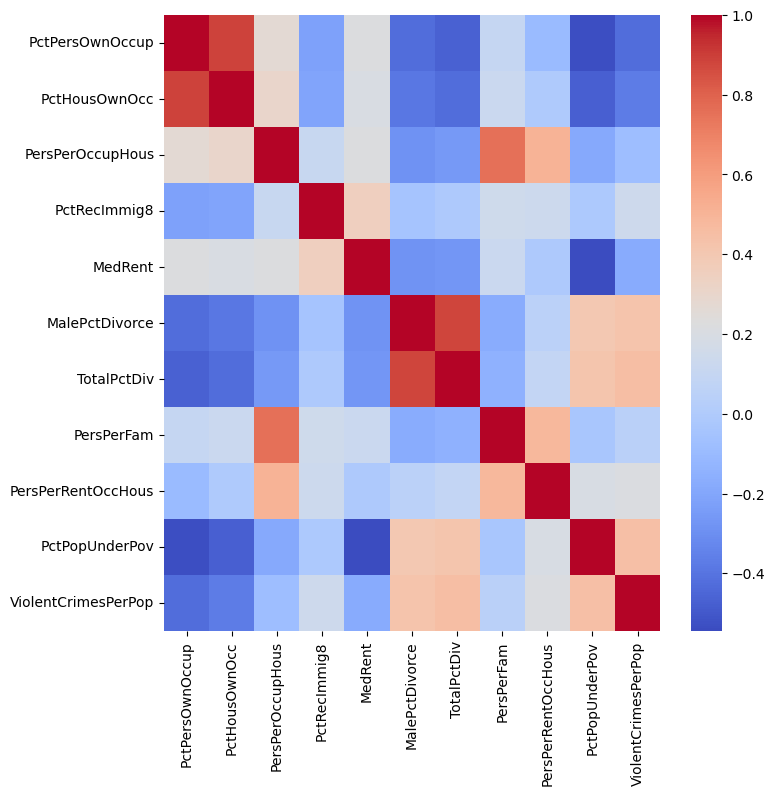

In [19]:
# Correlation between Independent Variables - Pearson

correlation_matrix = df_new[top_ten_features.append(pd.Index(['ViolentCrimesPerPop']))].corr(method='kendall')

plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

The top ten features have moderate correlation to the response variable.

## Linear Regression Model Assumption

In [20]:
# Prediciton for training
y_train_pred = LinReg.predict(X_train)

# Residuals
residuals = y_train_pred - y_train

# standardized residuals
std_residuals = residuals/np.sqrt(np.var(residuals))

Text(0, 0.5, 'Standardized Residuals')

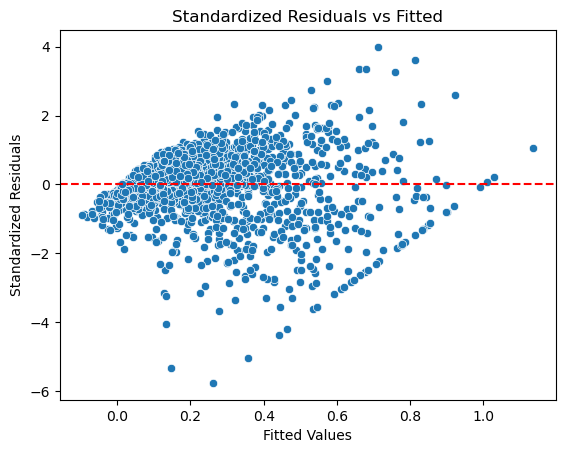

In [21]:
# Standardized Residuals vs. Fitted Values

sns.scatterplot(x=y_train_pred, y=std_residuals)

plt.axhline(0, color='red', linestyle='--')

plt.title('Standardized Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

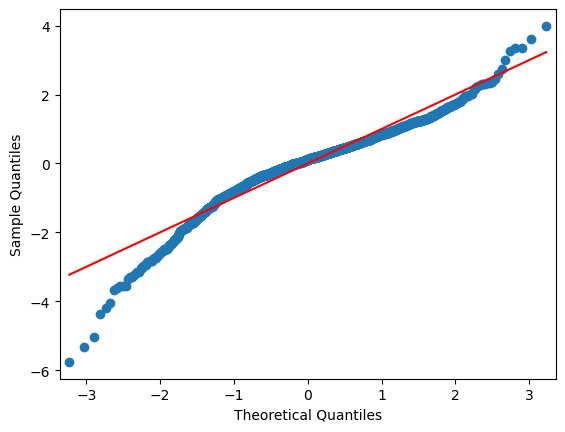

In [22]:
# Normal Q-Q

sm.qqplot(std_residuals, line='s')

plt.show()

- The points are not scattered randomly around 0, and there is also a violation of constant variance (homoscedasticity), where the variance of the residuals increases as the fitted values rising.
- The residuals do not follow normal distribution, as the points in the bottom-left and top-right corners deviate significantly from the red line.

It seems that the linear regression model that we have does not meet the required assumption, indicating the model might not be reliable, such as bias estimates or poor model fit.

In [23]:
rmse_train = root_mean_squared_error(y_train_pred,y_train)
print('RMSE Linear Regression (Train): ', round(rmse_train,4))

RMSE Linear Regression (Train):  0.128


# Regularization

Based on EDA that we have performed, we can see some independent variables are correlated to each other. In this section, we will explore regularization methods: Ridge, Lasso, and Elastic Net to reduce the importance of some features, or even remove them (Lasso).

## Ridge Regression

Ridge regression does not zero out the coefficients, but it shrinks the values towards zero. 

- The value of regularization parameter is chosen by peforming K-fold cross-validation. Then, the value of 1 is selected to be the best one. It means it does penalize the regression parameters but not too much.

In [24]:
# Create a RidgeCV object with cross-validation parameters
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train,y_train)

# Get the best alpha value
best_alpha = ridge_cv.alpha_

y_pred = ridge_cv.predict(X_valid)

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1383


In [25]:
best_alpha

1.0

In [26]:
# Ridge Regression Coefficient

ridge_cv.coef_

array([-0.05362788,  0.01200159,  0.17975495, -0.0679729 ,  0.00421206,
        0.06182878,  0.07652784, -0.17894151, -0.04633998,  0.05624534,
       -0.04552468,  0.0380957 ,  0.02233618, -0.08717436,  0.03736566,
       -0.17922387,  0.03978457, -0.00432823, -0.07492767,  0.03529608,
       -0.04149659, -0.13977257, -0.04420346, -0.04325566,  0.03247658,
        0.05118981,  0.00915512,  0.03719362, -0.21289231, -0.073935  ,
        0.00841863,  0.03953146, -0.04126526,  0.12483791, -0.05795869,
        0.0169376 ,  0.0837537 ,  0.07314841,  0.15373473,  0.14387521,
       -0.09826355, -0.0175231 , -0.02814631, -0.07066282, -0.15483968,
       -0.11723225, -0.01134932,  0.02449112, -0.16561488, -0.00867052,
        0.12400202, -0.07820365,  0.05888814, -0.02206543, -0.03691251,
        0.0124785 , -0.05316678, -0.03448663,  0.05536672,  0.03235037,
        0.02327389, -0.04916242, -0.04236955, -0.05091465,  0.18384434,
       -0.07068407, -0.06992943, -0.11414128,  0.16977251,  0.05

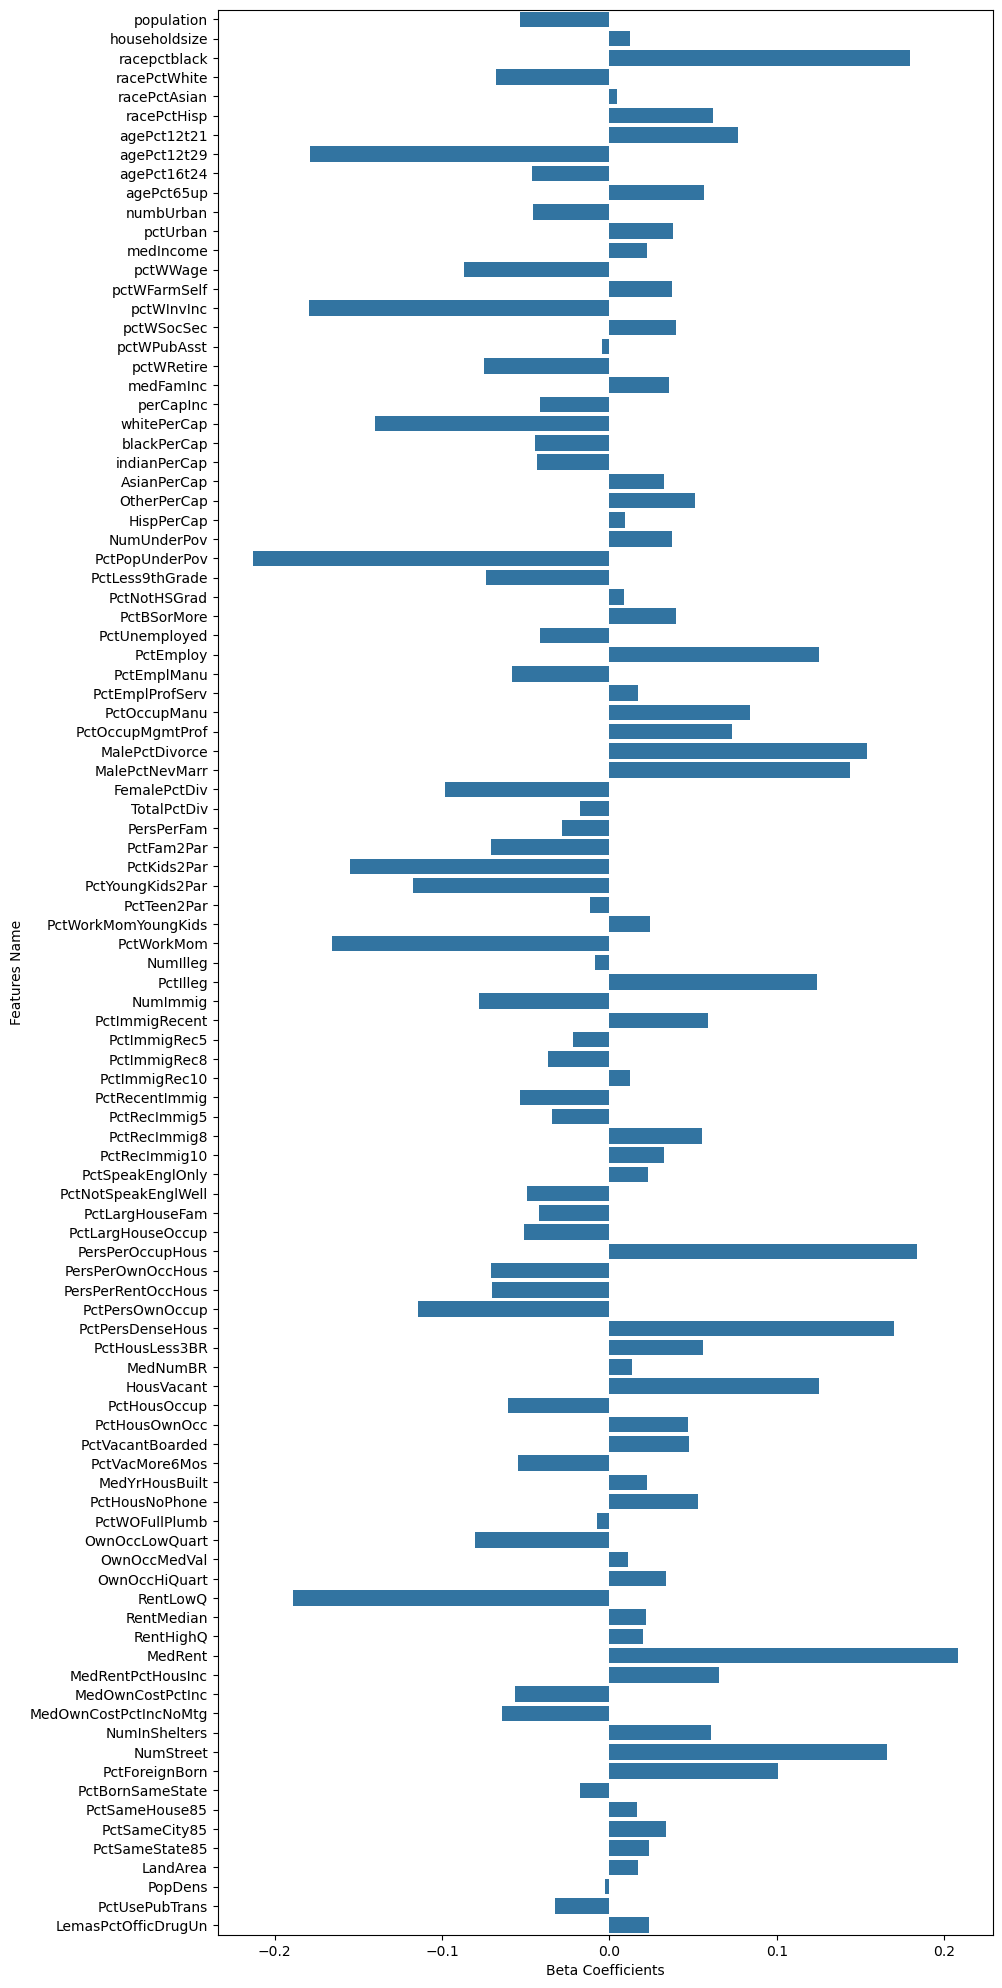

In [27]:
# Plot Beta Coef

plt.figure(figsize=(10,25))

sns.barplot(x=ridge_cv.coef_, y=df_new.columns[:-1])

plt.xlabel('Beta Coefficients')
plt.ylabel('Features Name')
plt.show()

In [28]:
# Get the top 10 features based on the coefficient values

# Get the absolute values
abs_values = np.abs(ridge_cv.coef_)

# Get the indices of the top ten maximum absolute values
top_ten_indices = abs_values.argsort()[-10:][::-1]

# Get the corresponding values
top_ten_values = ridge_cv.coef_[top_ten_indices]

top_ten_features = df_new.columns[top_ten_indices]

top_ten_features

Index(['PctPopUnderPov', 'MedRent', 'RentLowQ', 'PersPerOccupHous',
       'racepctblack', 'pctWInvInc', 'agePct12t29', 'PctPersDenseHous',
       'NumStreet', 'PctWorkMom'],
      dtype='object')

### Linear Regression Model Assumption

In [29]:
# Prediciton for training
y_train_pred = ridge_cv.predict(X_train)

# Residuals
residuals = y_train_pred - y_train

# standardized residuals
std_residuals = residuals/np.sqrt(np.var(residuals))

Text(0, 0.5, 'Standardized Residuals')

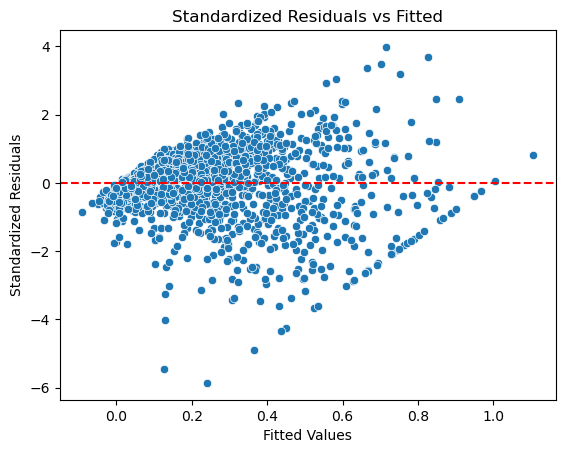

In [30]:
# Standardized Residuals vs. Fitted Values

sns.scatterplot(x=y_train_pred, y=std_residuals)

plt.axhline(0, color='red', linestyle='--')

plt.title('Standardized Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

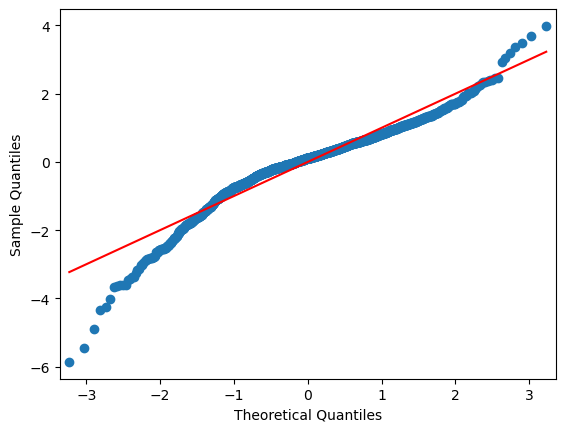

In [31]:
# Normal Q-Q

sm.qqplot(std_residuals, line='s')

plt.show()

## Lasso Regression

Lasso regression can be used as variable selection because it can suppress the coefficients to be exactly zero.

- Similarly, the regularization parameter is selected using K-fold CV, and the optimum value is 0.001, which is quite small. However, only 21 from 100 features are not zero, and it does remove a lot of variables.

In [32]:
# Create a RidgeCV object with cross-validation parameters
lasso_cv = LassoCV(alphas=[0.001,0.01, 0.1, 1, 10, 100], cv=5)
lasso_cv.fit(X_train,y_train)

# Get the best alpha value
best_alpha = lasso_cv.alpha_

y_pred = lasso_cv.predict(X_valid)

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1354


In [33]:
best_alpha

0.001

In [34]:
# Lasso Regression Coefficient

lasso_cv.coef_

array([ 0.        , -0.        ,  0.10944778, -0.11424122,  0.        ,
        0.        , -0.        , -0.01382588, -0.        ,  0.        ,
        0.        ,  0.0330866 ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.00715468,
        0.01509853,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.00212615,
       -0.        , -0.        , -0.        ,  0.12148148, -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.22936828,
       -0.05522291, -0.        , -0.        , -0.0454031 ,  0.        ,
        0.16760643,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.09959707,  0.  

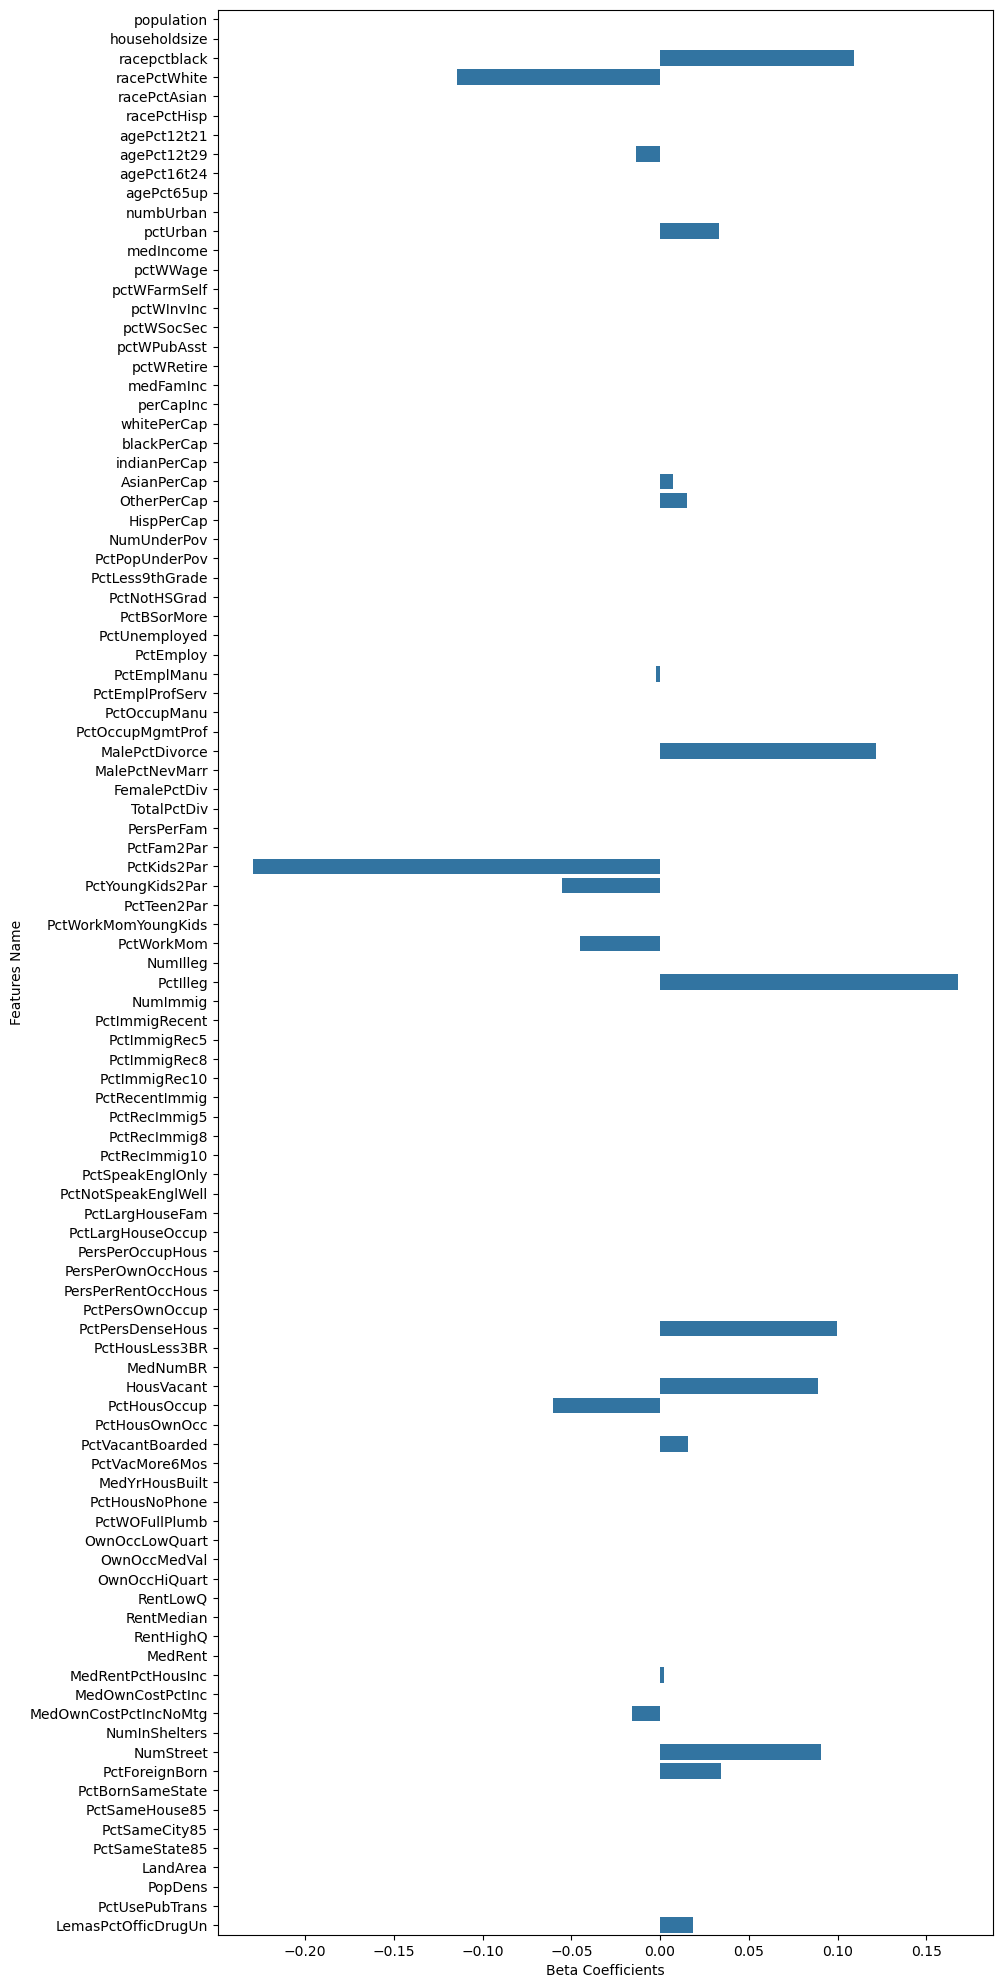

In [35]:
# Plot Beta Coef

plt.figure(figsize=(10,25))

sns.barplot(x=lasso_cv.coef_, y=df_new.columns[:-1])

plt.xlabel('Beta Coefficients')
plt.ylabel('Features Name')
plt.show()

In [36]:
# Get the top 10 features based on the coefficient values

# Get the absolute values
abs_values = np.abs(lasso_cv.coef_)

# Get the indices of the top ten maximum absolute values
top_ten_indices = abs_values.argsort()[-10:][::-1]

# Get the corresponding values
top_ten_values = lasso_cv.coef_[top_ten_indices]

top_ten_features = df_new.columns[top_ten_indices]

top_ten_features

Index(['PctKids2Par', 'PctIlleg', 'MalePctDivorce', 'racePctWhite',
       'racepctblack', 'PctPersDenseHous', 'NumStreet', 'HousVacant',
       'PctHousOccup', 'PctYoungKids2Par'],
      dtype='object')

### Linear Regression Model Assumption

In [37]:
# Prediciton for training
y_train_pred = lasso_cv.predict(X_train)

# Residuals
residuals = y_train_pred - y_train

# standardized residuals
std_residuals = residuals/np.sqrt(np.var(residuals))

Text(0, 0.5, 'Standardized Residuals')

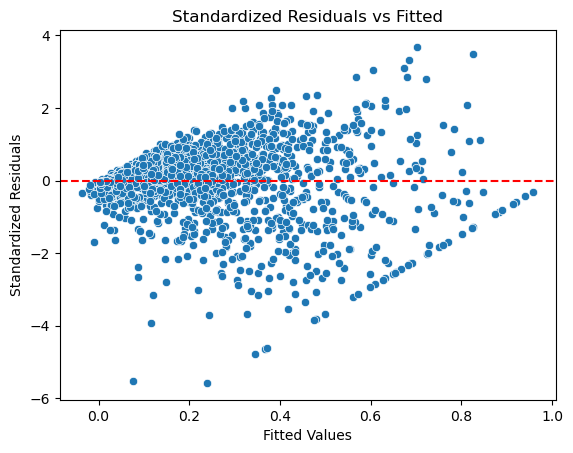

In [38]:
# Standardized Residuals vs. Fitted Values

sns.scatterplot(x=y_train_pred, y=std_residuals)

plt.axhline(0, color='red', linestyle='--')

plt.title('Standardized Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

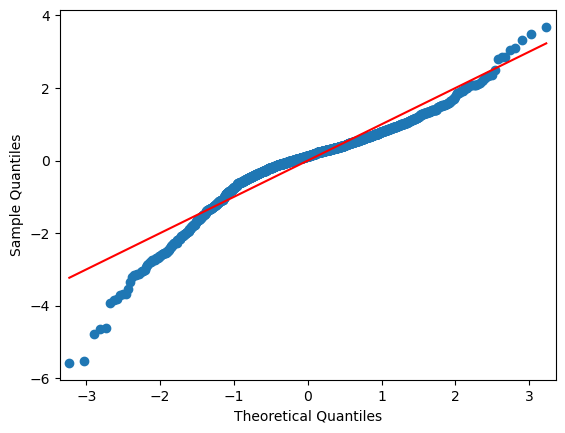

In [39]:
# Normal Q-Q

sm.qqplot(std_residuals, line='s')

plt.show()

## Elastic Net Regression

Elastic Net uses both Ridge and Lasso penalties. In scikit-learn, the objective function is defined as follows:
$$
\min_{w} \frac{1}{2n_{samples}} ||Xw - y||_2^2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2^2
$$

- If the l1_ratio ($\rho$) is closer to 1, it will become more similar to Lasso, which can surpress the regression parameters to be 0.
- The higher the alpha value, then it will penalize the regression parameter more.

In this exploration, l1_ratio and alpha are chosen using K-fold CV. The most optimum l1_ratio is 0.5, meaning it considers both Lasso and Ridge penalty equally. However, the selected alpha is 0.0001, which is very small. Moreover, we can see some paramaters are set to be zero.

In [40]:
# Create a ElasticNetCV object with cross-validation parameters
elasticnet_cv = ElasticNetCV(cv=5, 
                             l1_ratio=[.1, 0.2, .5, .7, .9, .95, .99, 1],
                             alphas=[0.0001,0.001,0.01, 0.1, 1, 10, 100],
                             random_state = 42)
elasticnet_cv.fit(X_train,y_train)

# Get the best alpha value
best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_

y_pred = elasticnet_cv.predict(X_valid)

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1389


In [41]:
best_alpha

0.0001

In [42]:
best_l1_ratio

0.5

In [43]:
# ElasticNet Regression Coefficient

elasticnet_cv.coef_

array([-0.05656452, -0.        ,  0.19479017, -0.05231375,  0.00346173,
        0.04923492,  0.08652907, -0.27902033, -0.        ,  0.04324226,
       -0.        ,  0.03606071,  0.        , -0.10862928,  0.04050088,
       -0.19326457,  0.02023113, -0.00305266, -0.07802159,  0.00419512,
       -0.        , -0.16210844, -0.0442133 , -0.04389689,  0.03040727,
        0.05033006,  0.00768965,  0.        , -0.24499601, -0.0704328 ,
       -0.        ,  0.05191777, -0.03974877,  0.12411797, -0.05536029,
        0.01241637,  0.07672622,  0.07713329,  0.16713424,  0.17163661,
       -0.12592621, -0.        , -0.03263328, -0.        , -0.23973257,
       -0.11878818, -0.0025943 ,  0.02783523, -0.17329546, -0.        ,
        0.11551375, -0.08182229,  0.04765713, -0.01898918, -0.01434777,
        0.        , -0.03602657, -0.        ,  0.01590712,  0.        ,
        0.        , -0.05432008, -0.03587334, -0.06496471,  0.29685162,
       -0.12549731, -0.09924739, -0.08051414,  0.19187948,  0.05

In [56]:
sum(elasticnet_cv.coef_==0)

19

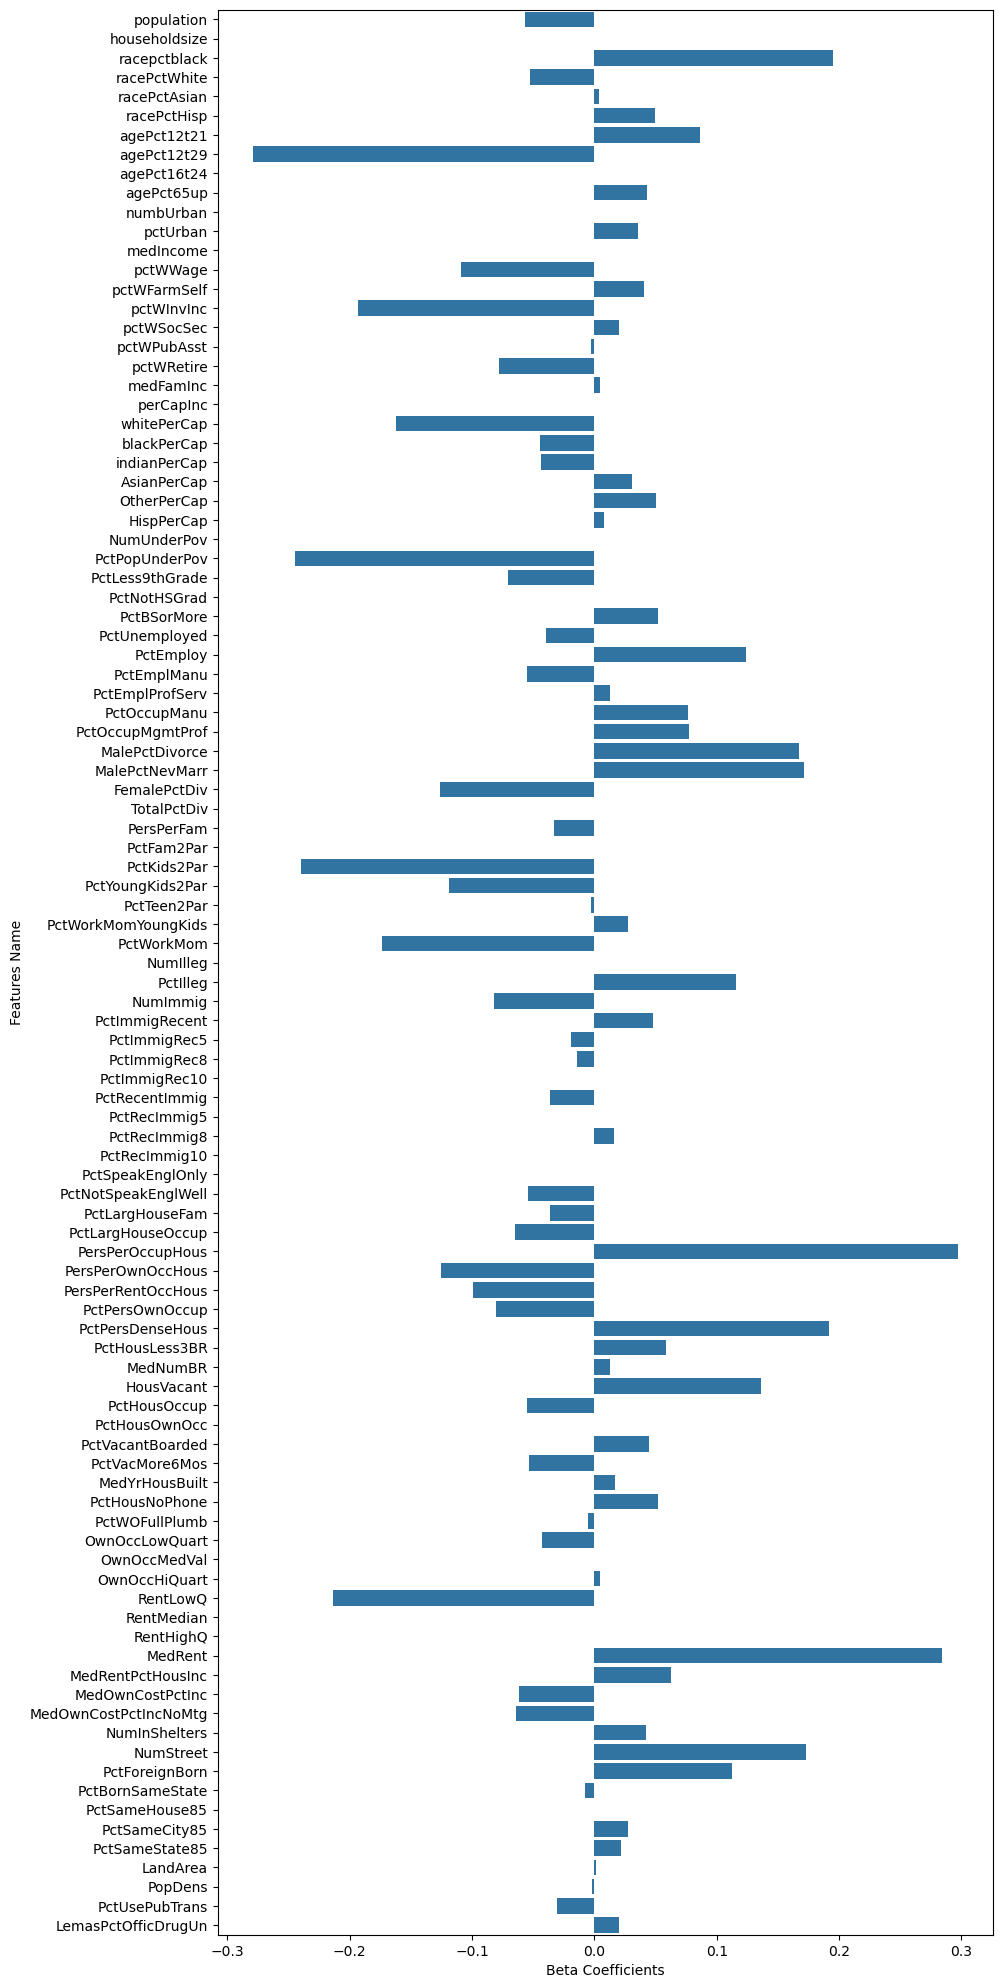

In [44]:
# Plot Beta Coef

plt.figure(figsize=(10,25))

sns.barplot(x=elasticnet_cv.coef_, y=df_new.columns[:-1])

plt.xlabel('Beta Coefficients')
plt.ylabel('Features Name')
plt.show()

In [45]:
# Get the top 10 features based on the coefficient values

# Get the absolute values
abs_values = np.abs(elasticnet_cv.coef_)

# Get the indices of the top ten maximum absolute values
top_ten_indices = abs_values.argsort()[-10:][::-1]

# Get the corresponding values
top_ten_values = elasticnet_cv.coef_[top_ten_indices]

top_ten_features = df_new.columns[top_ten_indices]

top_ten_features

Index(['PersPerOccupHous', 'MedRent', 'agePct12t29', 'PctPopUnderPov',
       'PctKids2Par', 'RentLowQ', 'racepctblack', 'pctWInvInc',
       'PctPersDenseHous', 'PctWorkMom'],
      dtype='object')

### Linear Regression Model Assumption

In [46]:
# Prediciton for training
y_train_pred = elasticnet_cv.predict(X_train)

# Residuals
residuals = y_train_pred - y_train

# standardized residuals
std_residuals = residuals/np.sqrt(np.var(residuals))

Text(0, 0.5, 'Standardized Residuals')

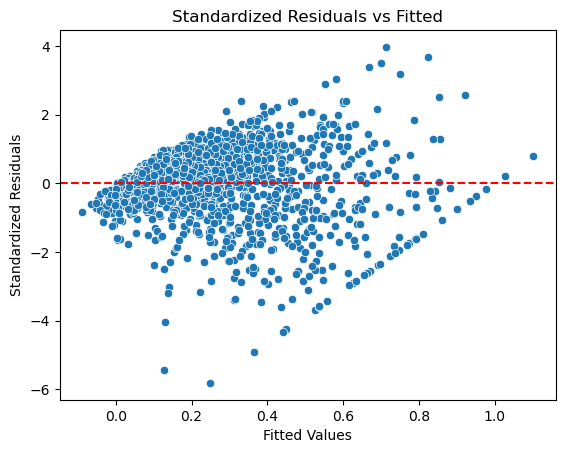

In [47]:
# Standardized Residuals vs. Fitted Values

sns.scatterplot(x=y_train_pred, y=std_residuals)

plt.axhline(0, color='red', linestyle='--')

plt.title('Standardized Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

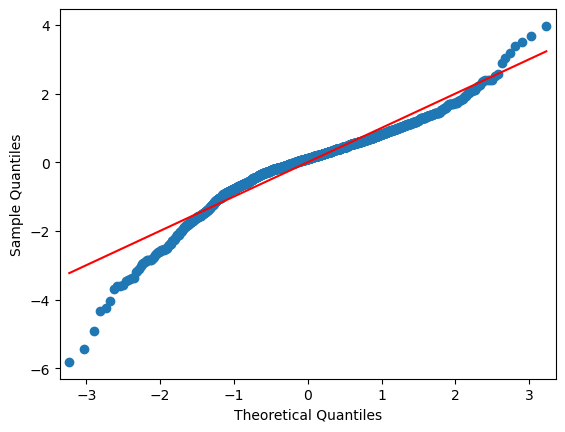

In [48]:
# Normal Q-Q

sm.qqplot(std_residuals, line='s')

plt.show()

# Methods Comparison

In [49]:
# Prediciton for test set

y_pred_linreg = LinReg.predict(X_test)
rmse_linreg = root_mean_squared_error(y_pred_linreg,y_test)

y_pred_ridge = ridge_cv.predict(X_test)
rmse_ridge = root_mean_squared_error(y_pred_ridge,y_test)

y_pred_lasso = lasso_cv.predict(X_test)
rmse_lasso = root_mean_squared_error(y_pred_lasso,y_test)

y_pred_enet = elasticnet_cv.predict(X_test)
rmse_enet = root_mean_squared_error(y_pred_enet,y_test)

# Create DataFrame
evaluation_result = [
    {'Name': 'Linear Regression', 'RMSE': rmse_linreg},
    {'Name': 'Ridge', 'RMSE': rmse_ridge},
    {'Name': 'Lasso', 'RMSE': rmse_lasso},
    {'Name': 'Elastic Net', 'RMSE':rmse_enet}
]

evaluation_result_df = pd.DataFrame(evaluation_result, columns=['Name', 'RMSE'])

In [50]:
evaluation_result_df

,Name,RMSE
0,Linear Regression,0.131502
1,Ridge,0.130607
2,Lasso,0.131308
3,Elastic Net,0.130347


- The performance of regularized regressions are only slightly better than linear regression without regularization.
- The ridge regression with only left with 21 features have on-par performances with linear regression without regularization.
- Elastic net has the best performance.

In [51]:
# Comparing coefficients' values ratio: coef/sum(abs(coefs))

coef_all = {
    'linreg_coef_ratio':LinReg.coef_/sum(abs(LinReg.coef_)), 
    'ridge_coef_ratio':ridge_cv.coef_/sum(abs(ridge_cv.coef_)), 
    'lasso_coef_ratio':lasso_cv.coef_/sum(abs(lasso_cv.coef_)), 
    'elasticnet_coef_ratio':elasticnet_cv.coef_/sum(abs(elasticnet_cv.coef_))}
coef_all_df = pd.DataFrame(data=coef_all, index=df_new.columns[:-1])

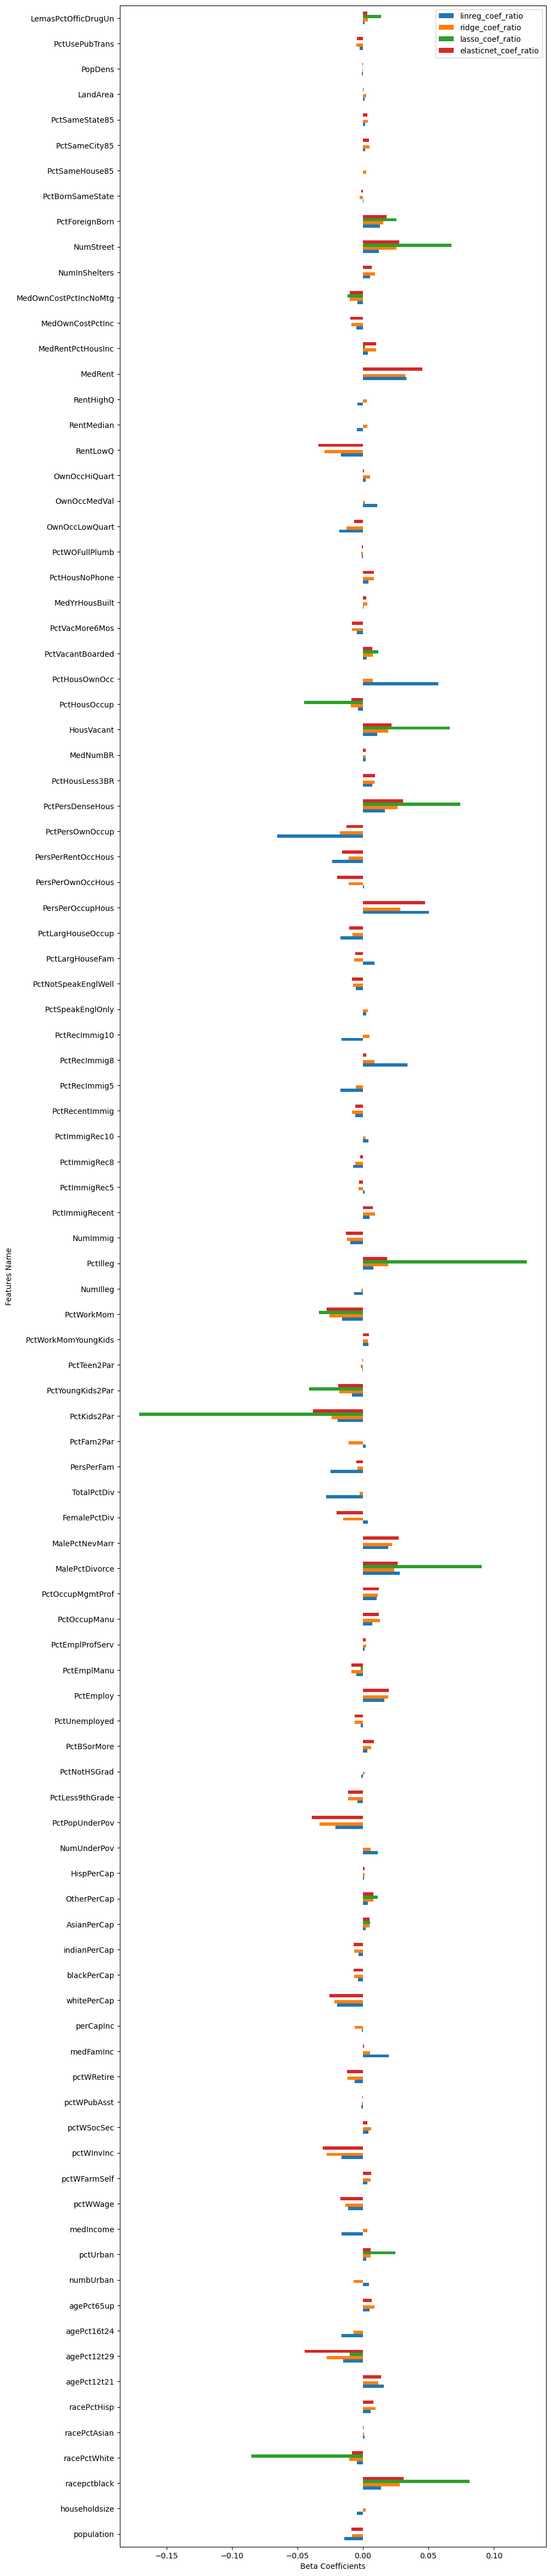

In [52]:
coef_all_df.plot.barh(figsize=(10, 60))

plt.xlabel('Beta Coefficients')
plt.ylabel('Features Name')
plt.show()

# Conclusion

Elastic Net demonstrated the best performance, though only sslightly outperformed Ridge. In this case, Elastic Net removed fewer features (19) compared Lasso (79). However, Elastic Net still did not fully satisfy the assumptions of linear regression, including zero mean, constant variance, and normally distributed for the residuals.